In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

from scipy import stats
import collections

import warnings
# warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

from pathlib import Path

import db_queries as db
import vivarium_helpers.id_helper as idh
import gbd_mapping
from vivarium import Artifact

# Add the repo directory vivarium_research_ciff_sam/ to sys.path
import os, sys
repo_path = os.path.abspath('../..')
sys.path.append(repo_path)
# Assumes vivarium_research_ciff_sam/ is in sys.path
# import model_validation.vivarium_transformed_output as vto
# import model_validation.vivarium_raw_output as vro
import model_validation.vivarium_output_processing as vp
import model_validation.ciff_sam_results as csr
import model_validation.ciff_sam_plots as csp

%load_ext autoreload
%autoreload 2

!pwd
!whoami
!date

/ihme/homes/ndbs/vivarium_research_ciff_sam/model_validation/model4
ndbs
Fri Oct 15 15:54:46 PDT 2021


# Load results and set global index columns

In [2]:
results = csr.VivariumResults.cleaned_from_model_spec('4.5.2')
results.table_names()

['wasting_transition_count',
 'wasting_state_person_time',
 'deaths',
 'stunting_state_person_time',
 'population',
 'ylls',
 'ylds',
 'person_time',
 'cause_state_person_time',
 'cause_transition_count']

In [3]:
vp.set_global_index_columns(vp.INDEX_COLUMNS+['x_factor_effect'])
vp.INDEX_COLUMNS

['input_draw', 'scenario', 'x_factor_effect']

# Compute X-factor rate ratios stratified by year and age

In [5]:
wasting_rate_ratio_by_year_age = csr.get_x_factor_wasting_transition_rate_ratio(results, ['year', 'age'])
wasting_rate_ratio_by_year_age

,year,age,transition,input_draw,scenario,x_factor_effect,value,numerator_measure,denominator_measure,multiplier
0,2022,12_to_23_months,mild_child_wasting_to_moderate_acute_malnutrition,29,baseline,1.1,1.112005,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
1,2022,12_to_23_months,mild_child_wasting_to_moderate_acute_malnutrition,29,baseline,1.2,1.216690,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
2,2022,12_to_23_months,mild_child_wasting_to_moderate_acute_malnutrition,29,baseline,1.3,1.299578,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
3,2022,12_to_23_months,mild_child_wasting_to_moderate_acute_malnutrition,29,baseline,1.4,1.373513,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
...,...,...,...,...,...,...,...,...,...,...
18896,2026,6-11_months,susceptible_to_child_wasting_to_mild_child_was...,946,wasting_treatment,1.2,1.154112,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
18897,2026,6-11_months,susceptible_to_child_wasting_to_mild_child_was...,946,wasting_treatment,1.3,1.278448,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
18898,2026,6-11_months,susceptible_to_child_wasting_to_mild_child_was...,946,wasting_treatment,1.4,1.329408,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
18899,2026,6-11_months,susceptible_to_child_wasting_to_mild_child_was...,946,wasting_treatment,1.5,1.412776,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1


In [6]:
wasting_rate_ratio_by_year_age.transition.unique()

array(['mild_child_wasting_to_moderate_acute_malnutrition',
       'mild_child_wasting_to_susceptible_to_child_wasting',
       'moderate_acute_malnutrition_to_mild_child_wasting',
       'moderate_acute_malnutrition_to_severe_acute_malnutrition',
       'severe_acute_malnutrition_to_mild_child_wasting',
       'severe_acute_malnutrition_to_moderate_acute_malnutrition',
       'susceptible_to_child_wasting_to_mild_child_wasting'], dtype=object)

In [7]:
wasting_incidence_transitions = (
    'susceptible_to_child_wasting_to_mild_child_wasting',
    'mild_child_wasting_to_moderate_acute_malnutrition',
    'moderate_acute_malnutrition_to_severe_acute_malnutrition',
)

# Plot mild wasting incidence rate ratio over time for each value of X-factor effect

They match. Great!

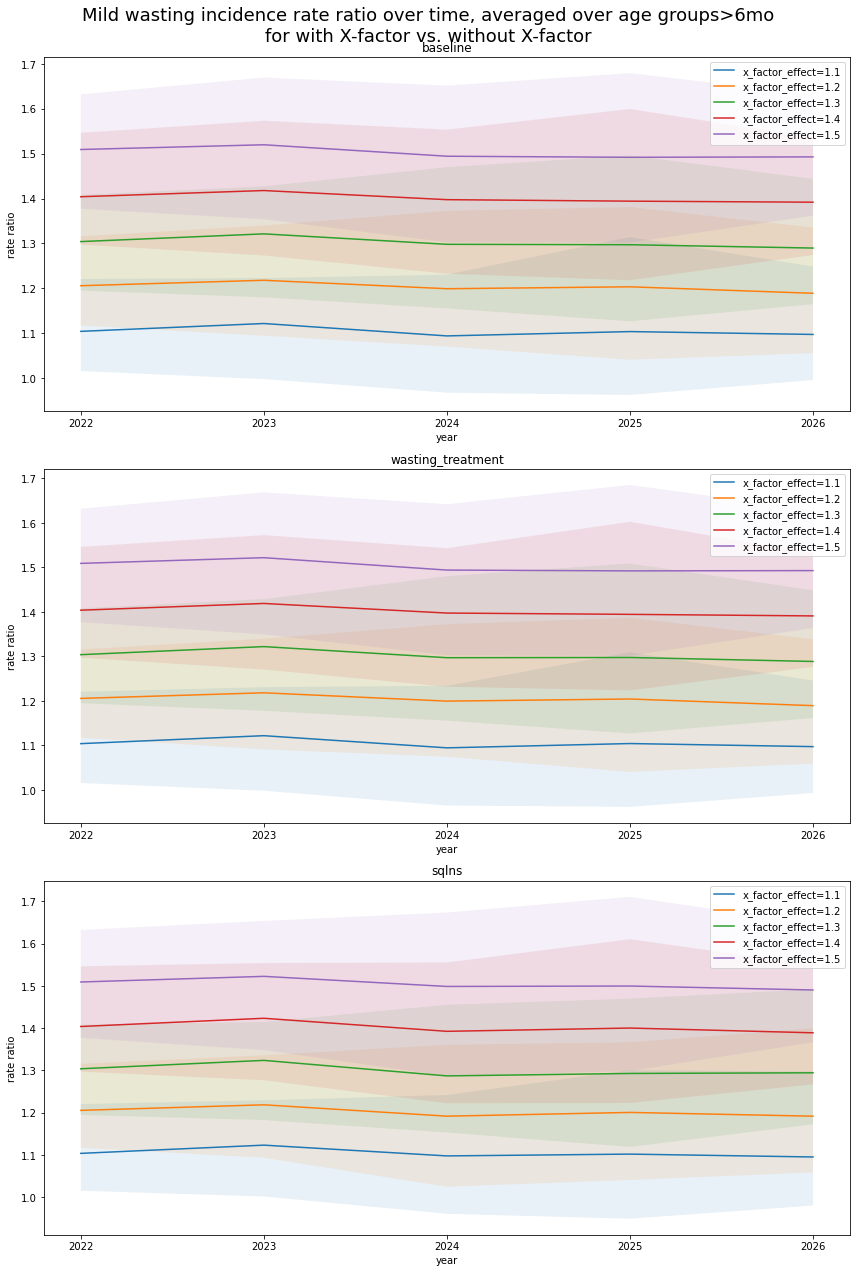

In [31]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year_age.query("transition=='susceptible_to_child_wasting_to_mild_child_wasting'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time, averaged over age groups>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

# Oops, since I stratified by age, it makes more sense to look at each age group separately

They all look good.

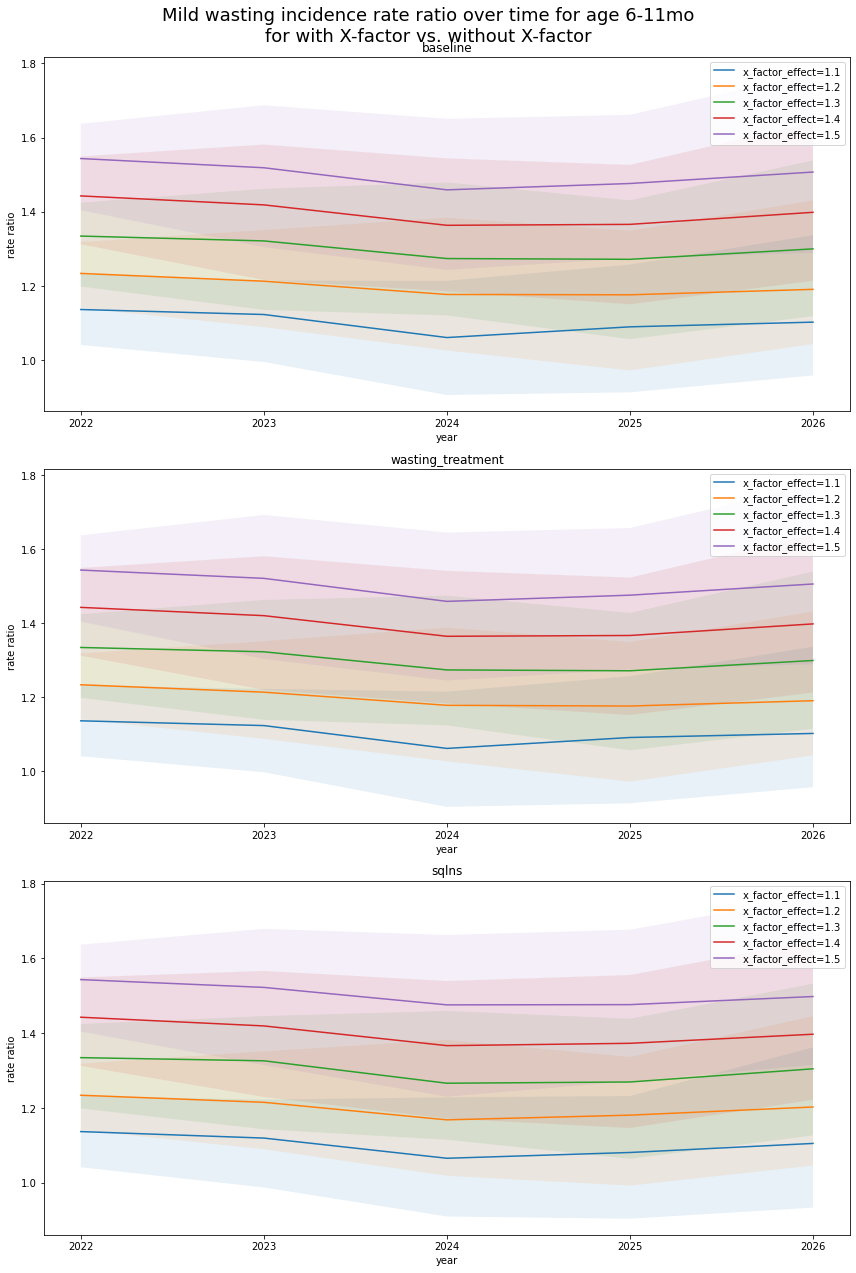

In [32]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year_age.query(
        "transition=='susceptible_to_child_wasting_to_mild_child_wasting' and age=='6-11_months'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time for age 6-11mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

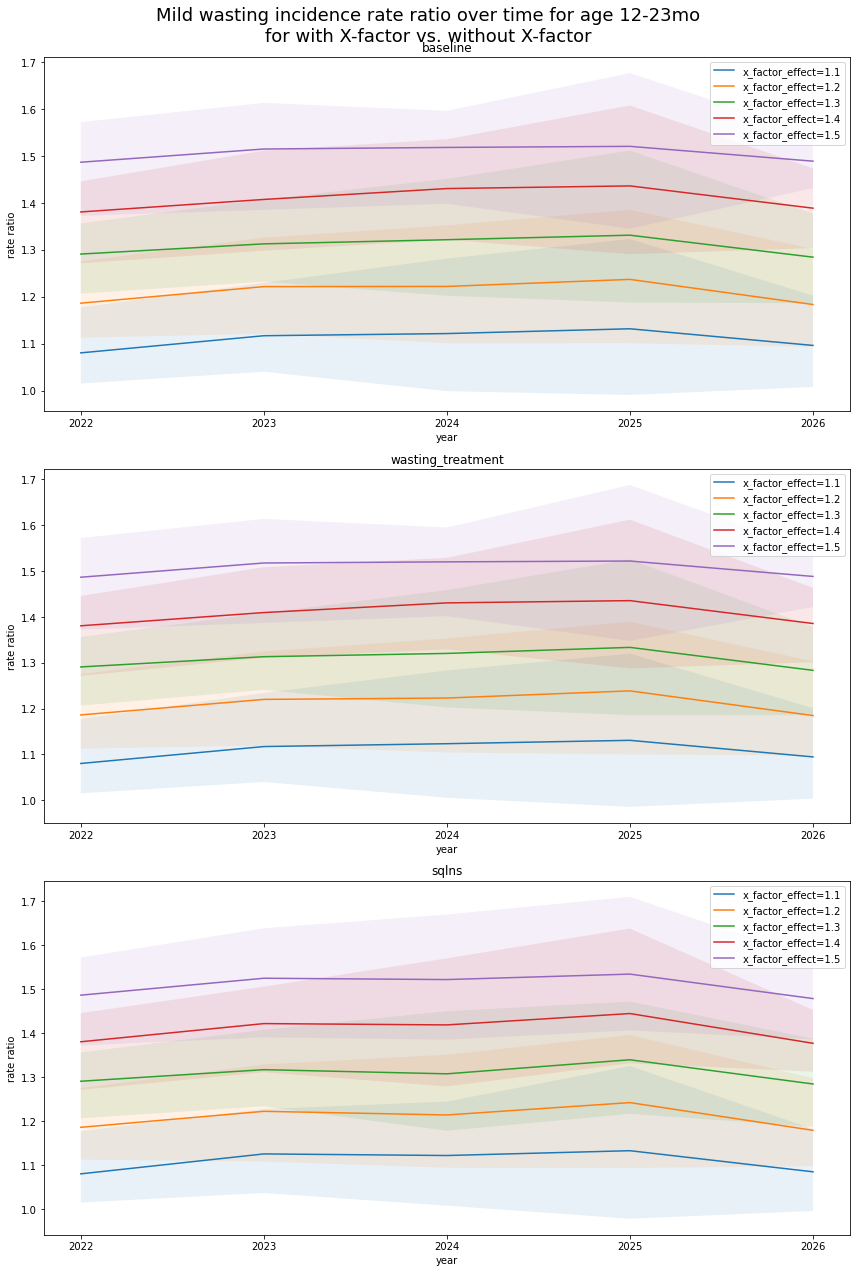

In [33]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year_age.query(
        "transition=='susceptible_to_child_wasting_to_mild_child_wasting' and age=='12_to_23_months'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time for age 12-23mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

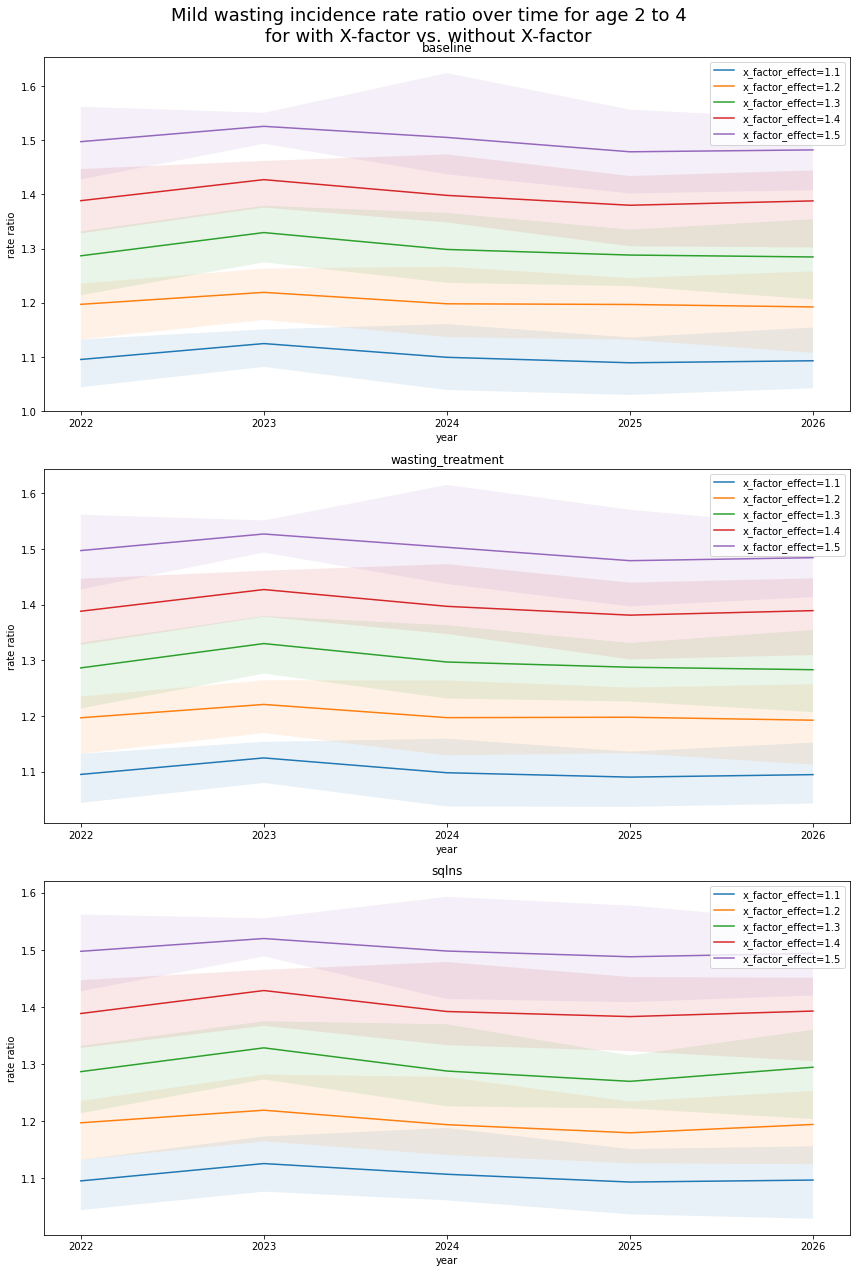

In [34]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year_age.query(
        "transition=='susceptible_to_child_wasting_to_mild_child_wasting' and age=='2_to_4'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time for age 2 to 4"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

# Now compute X-factor rate ratios stratified by year only

In [16]:
wasting_rate_ratio_by_year = csr.get_x_factor_wasting_transition_rate_ratio(results, ['year'])
wasting_rate_ratio_by_year

,year,transition,input_draw,scenario,x_factor_effect,value,numerator_measure,denominator_measure,multiplier
0,2022,mild_child_wasting_to_moderate_acute_malnutrition,29,baseline,1.1,1.111603,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
1,2022,mild_child_wasting_to_moderate_acute_malnutrition,29,baseline,1.2,1.214612,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
2,2022,mild_child_wasting_to_moderate_acute_malnutrition,29,baseline,1.3,1.309192,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
3,2022,mild_child_wasting_to_moderate_acute_malnutrition,29,baseline,1.4,1.397571,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
...,...,...,...,...,...,...,...,...,...
6296,2026,susceptible_to_child_wasting_to_mild_child_was...,946,wasting_treatment,1.2,1.172504,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
6297,2026,susceptible_to_child_wasting_to_mild_child_was...,946,wasting_treatment,1.3,1.278598,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
6298,2026,susceptible_to_child_wasting_to_mild_child_was...,946,wasting_treatment,1.4,1.379262,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1
6299,2026,susceptible_to_child_wasting_to_mild_child_was...,946,wasting_treatment,1.5,1.457853,transition_rate_among_x_factor_cat1,transition_rate_among_x_factor_cat2,1


# Plot incidence rate ratio over time for each wasting category

They all match the X-factor effect. Great!

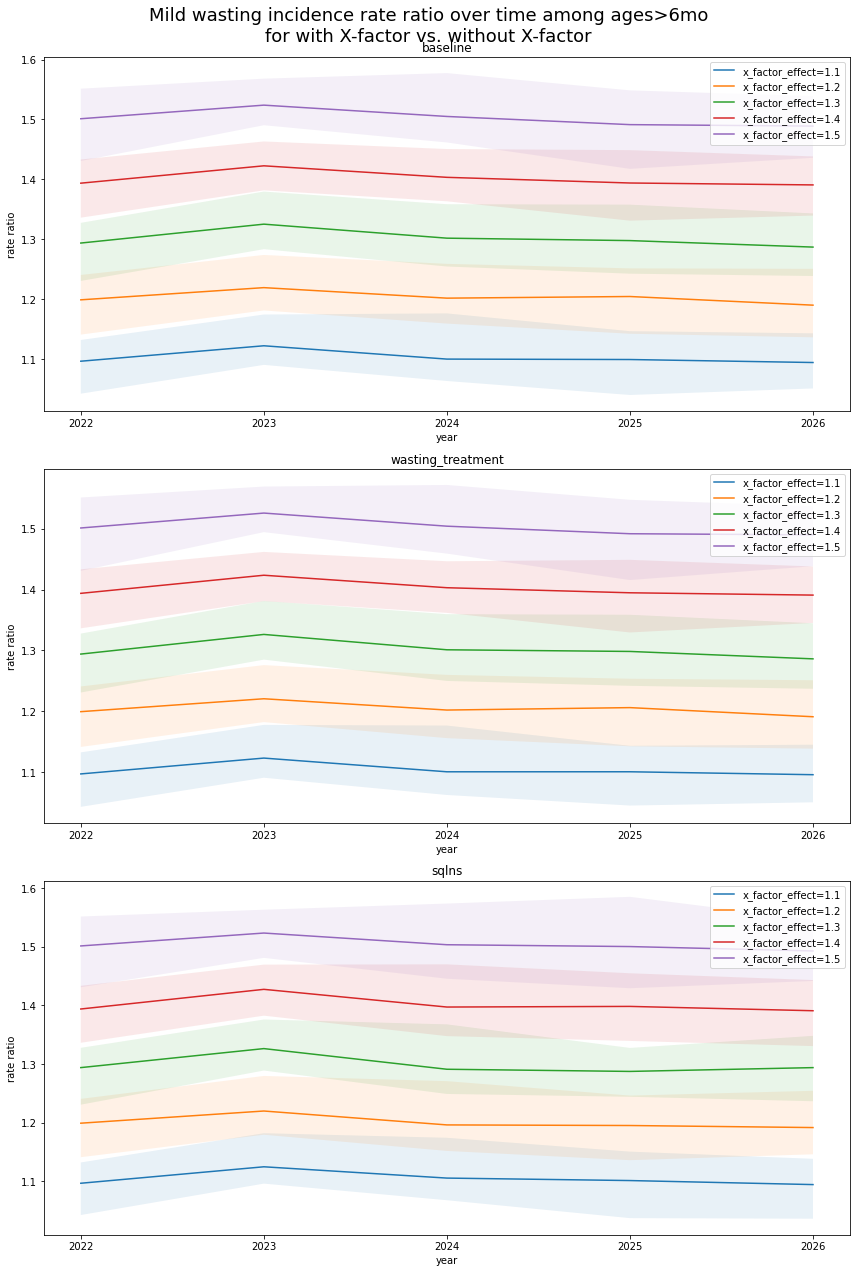

In [30]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='susceptible_to_child_wasting_to_mild_child_wasting'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Mild wasting incidence rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

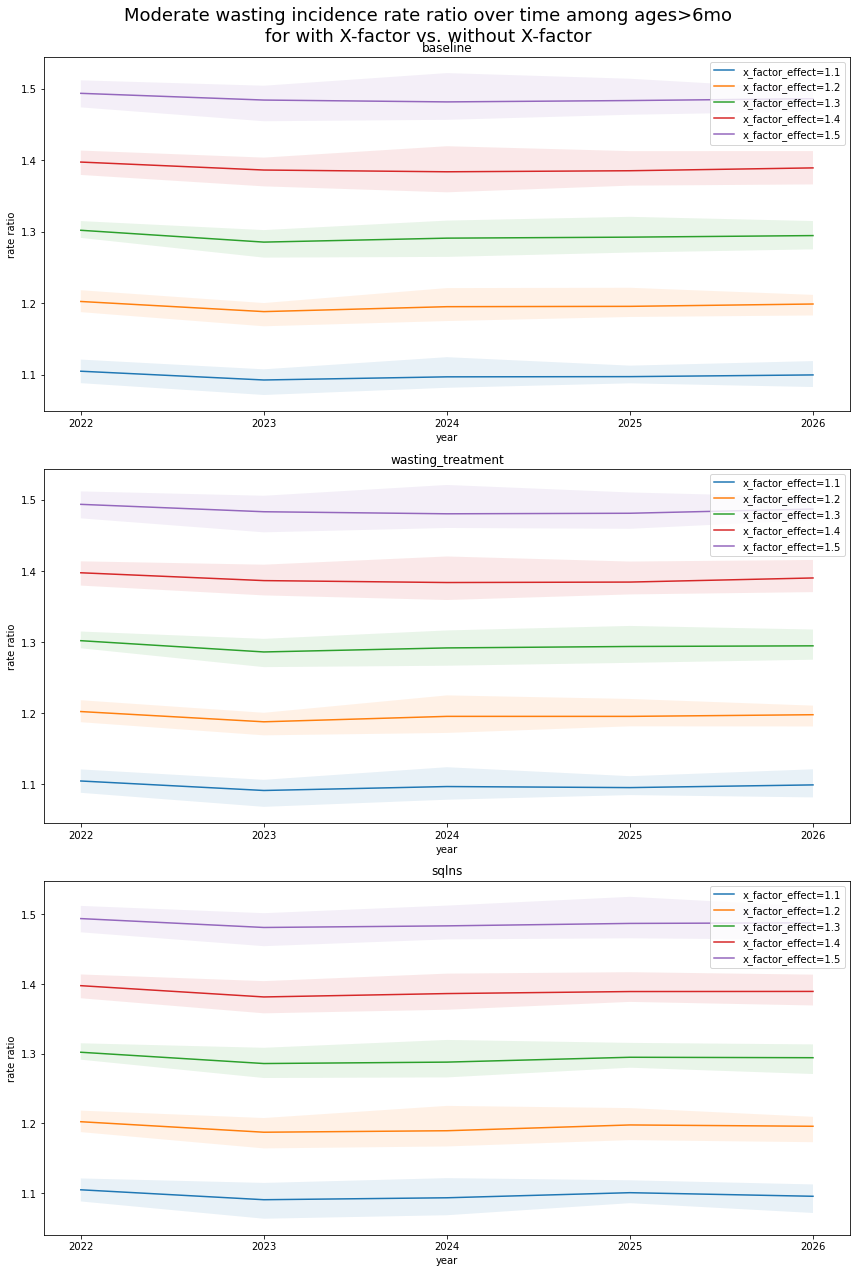

In [29]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='mild_child_wasting_to_moderate_acute_malnutrition'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Moderate wasting incidence rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

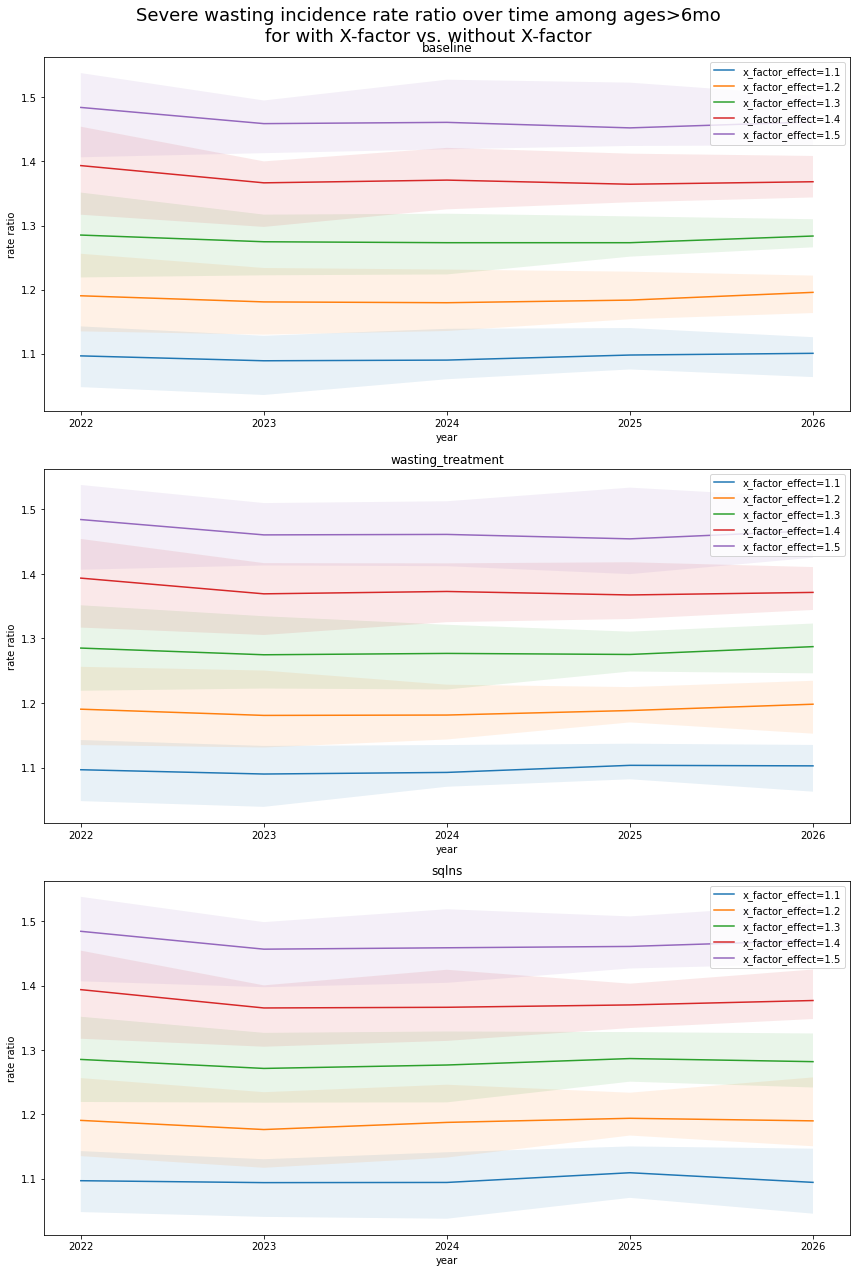

In [28]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='moderate_acute_malnutrition_to_severe_acute_malnutrition'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Severe wasting incidence rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

# Now plot remission rate ratios over time to make sure they're always 1

Looks good.

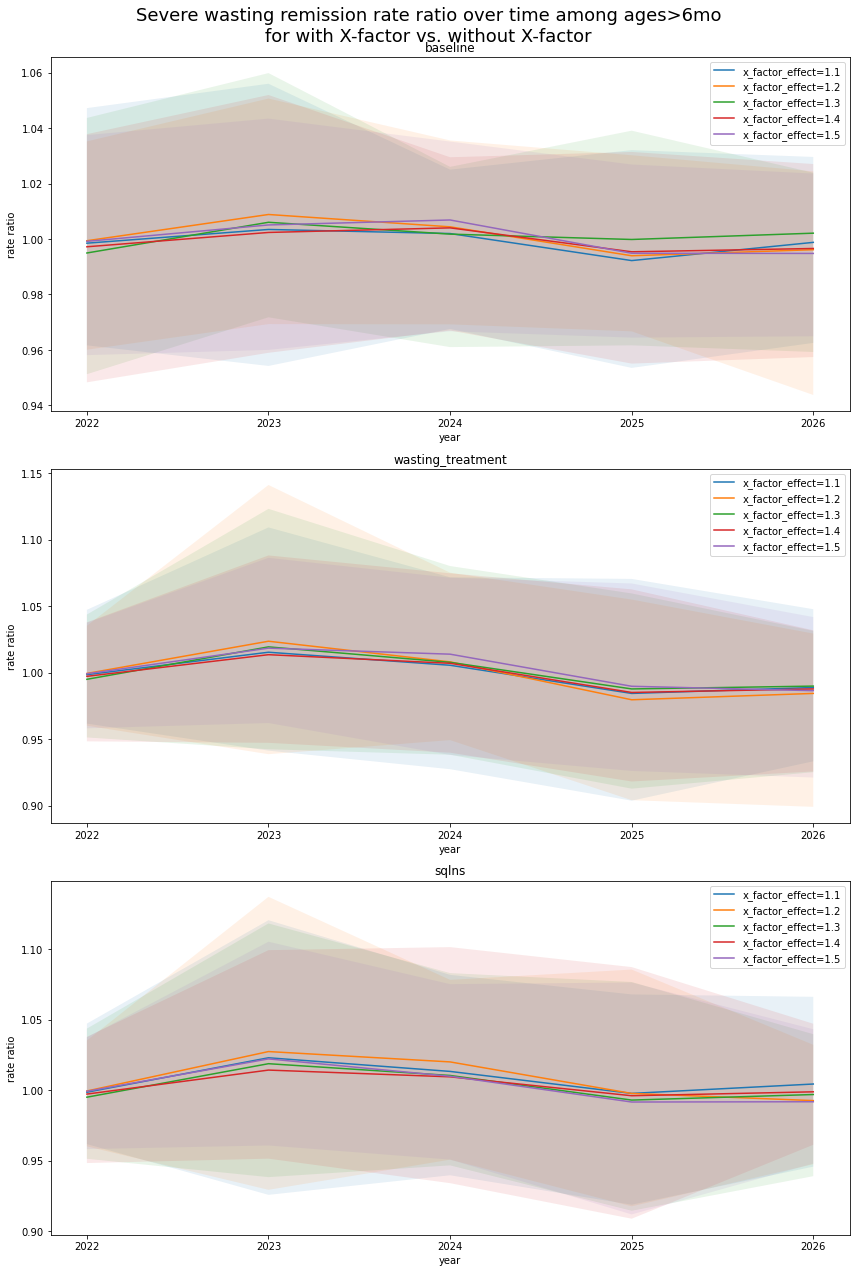

In [27]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='severe_acute_malnutrition_to_moderate_acute_malnutrition'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Severe wasting remission rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

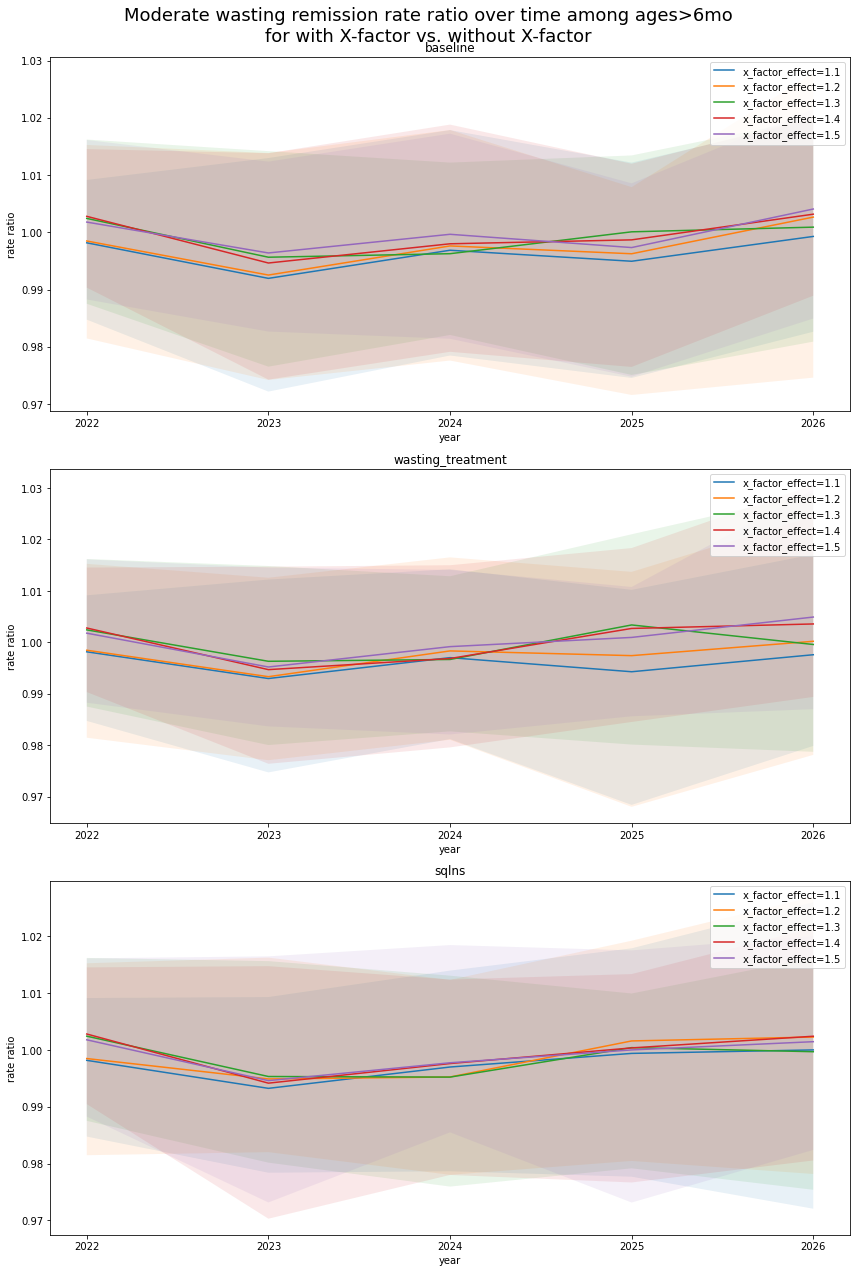

In [26]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='moderate_acute_malnutrition_to_mild_child_wasting'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Moderate wasting remission rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

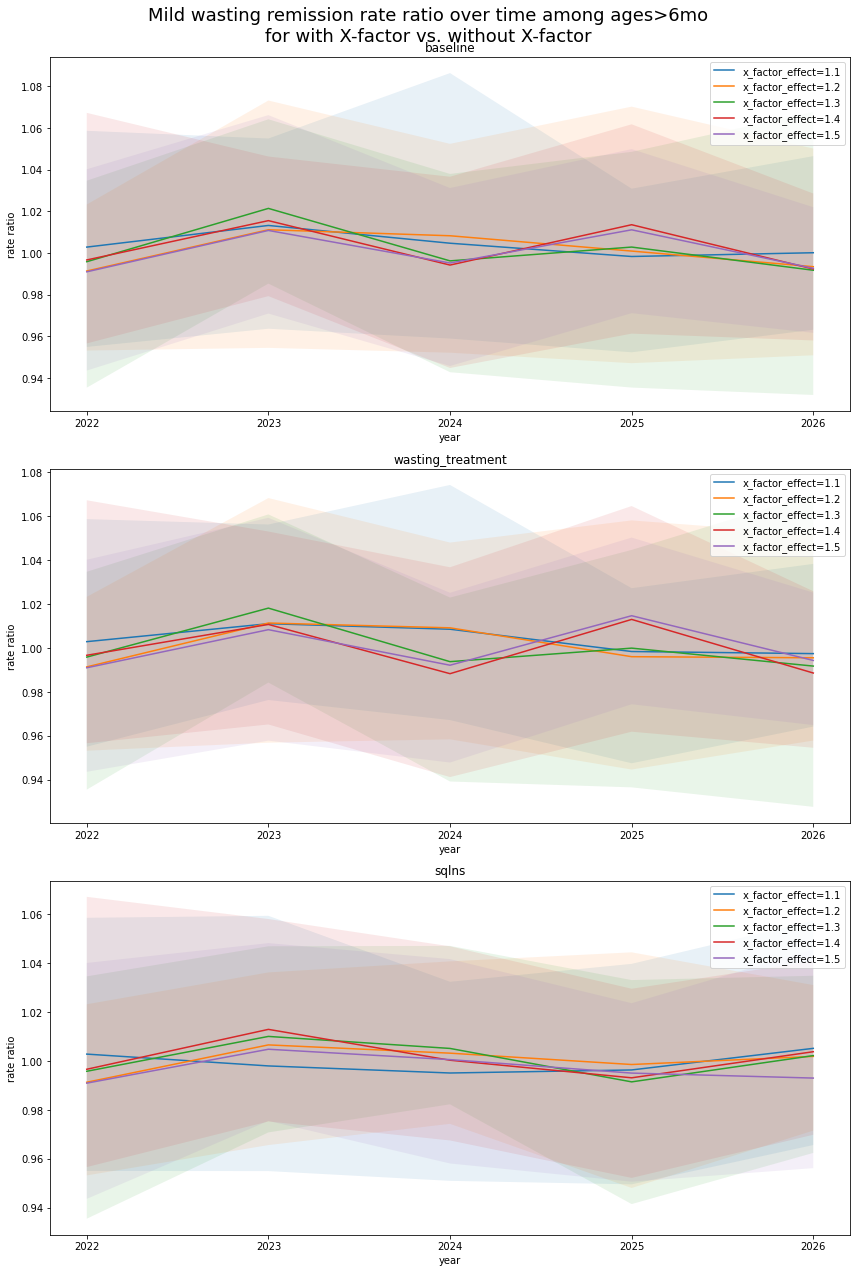

In [25]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='mild_child_wasting_to_susceptible_to_child_wasting'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Mild wasting remission rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)

# The sucessful SAM treatment rate ratio should also be 1

It is.

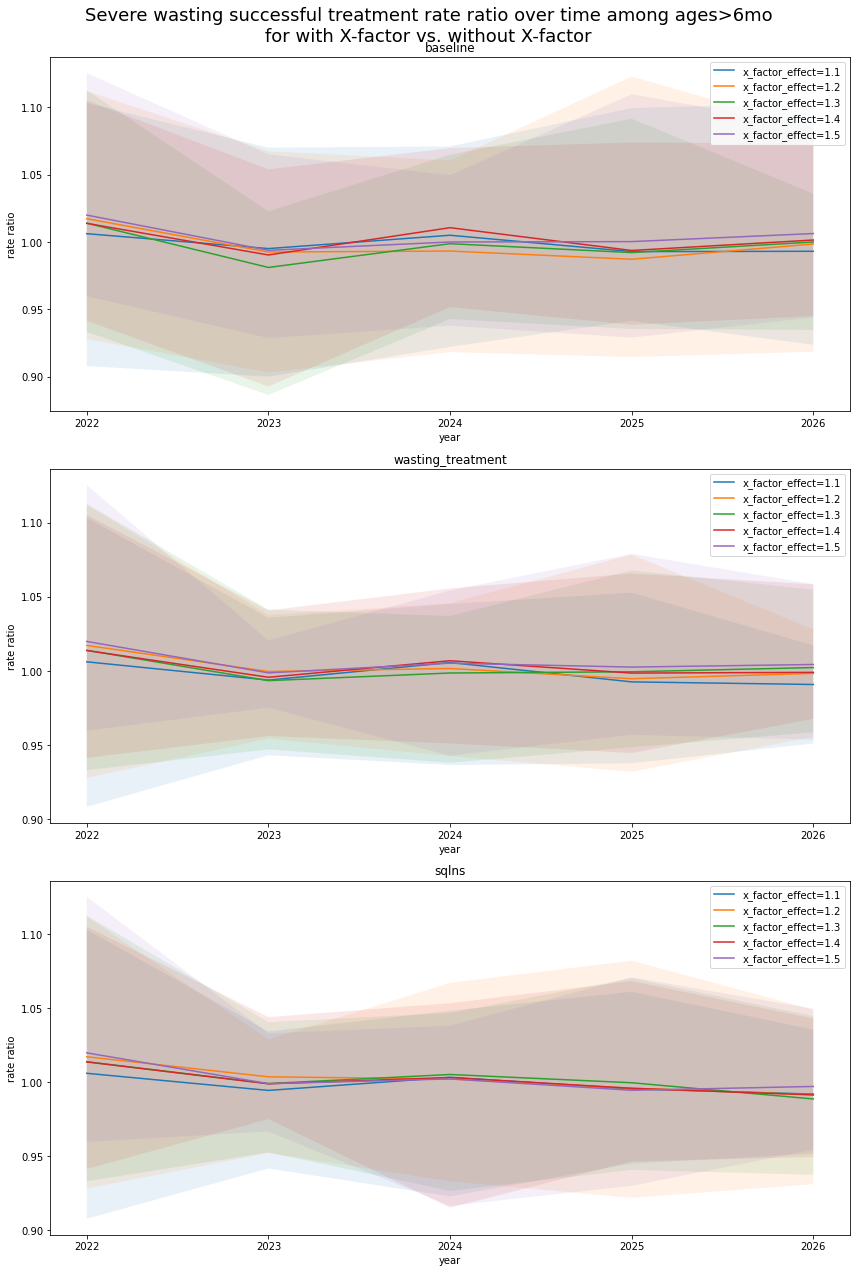

In [24]:
fig = csp.plot_over_time_by_column_for_each_scenario(
    wasting_rate_ratio_by_year.query("transition=='severe_acute_malnutrition_to_mild_child_wasting'"),
    colname='x_factor_effect',
    ylabel="rate ratio",
    suptitle="Severe wasting successful treatment rate ratio over time among ages>6mo"
        "\nfor with X-factor vs. without X-factor",
    uncertainty=True,
)